In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [118]:
data = pd.read_csv("shopping_trends.csv")

In [119]:
data.info

<bound method DataFrame.info of       Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2            

In [120]:
data.dtypes

Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object

In [121]:
data.describe(include='all')

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Credit Card,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,696,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.749949,NaN,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716223,NaN,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


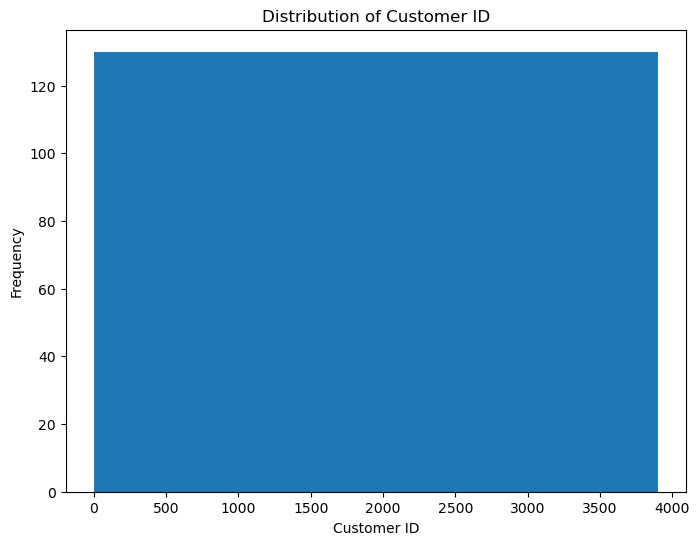

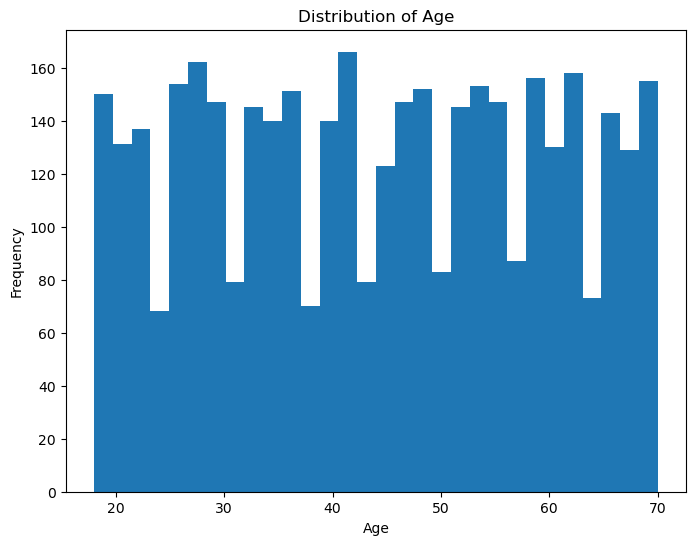

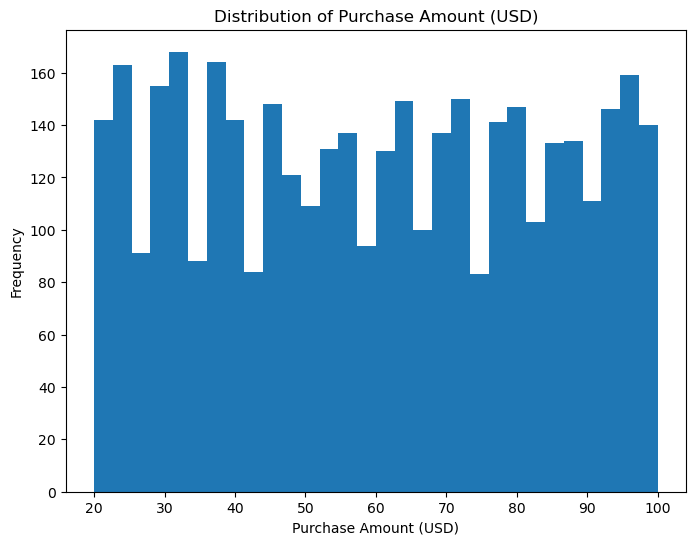

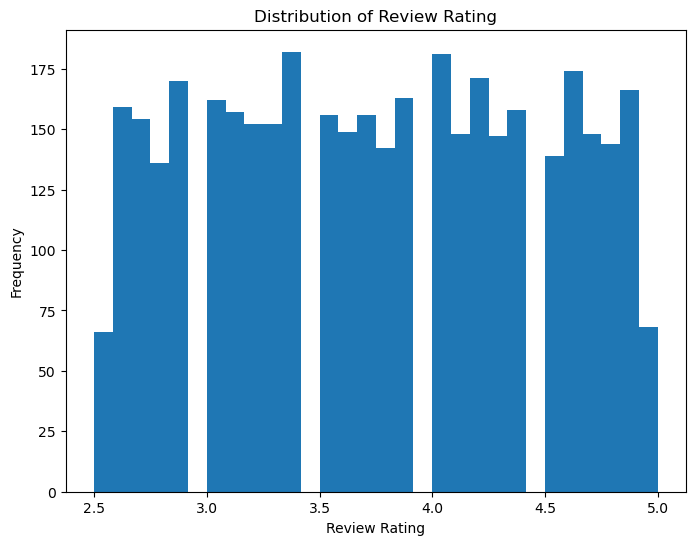

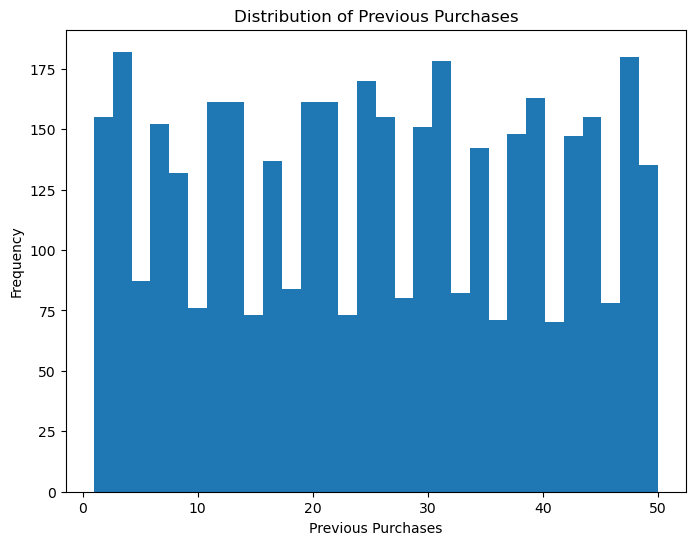

In [122]:
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns

# Plot distribution for each numerical column
for column in numerical_columns:
    data[column].plot(kind='hist', bins=30, figsize=(8, 6))
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [123]:
# Check for missing values
missing_values = data.isnull().sum()

# Check for duplicates
duplicates = data.duplicated().sum()

missing_values, duplicates

(Customer ID                 0
 Age                         0
 Gender                      0
 Item Purchased              0
 Category                    0
 Purchase Amount (USD)       0
 Location                    0
 Size                        0
 Color                       0
 Season                      0
 Review Rating               0
 Subscription Status         0
 Payment Method              0
 Shipping Type               0
 Discount Applied            0
 Promo Code Used             0
 Previous Purchases          0
 Preferred Payment Method    0
 Frequency of Purchases      0
 dtype: int64,
 0)

In [124]:
# Calculate correlation matrix for numerical columns
correlation_matrix = data.select_dtypes(include=[np.number]).corr()

# Print correlation matrix
print(correlation_matrix)

                       Customer ID       Age  Purchase Amount (USD)  \
Customer ID               1.000000 -0.004079               0.011048   
Age                      -0.004079  1.000000              -0.010424   
Purchase Amount (USD)     0.011048 -0.010424               1.000000   
Review Rating             0.001343 -0.021949               0.030776   
Previous Purchases       -0.039159  0.040445               0.008063   

                       Review Rating  Previous Purchases  
Customer ID                 0.001343           -0.039159  
Age                        -0.021949            0.040445  
Purchase Amount (USD)       0.030776            0.008063  
Review Rating               1.000000            0.004229  
Previous Purchases          0.004229            1.000000  


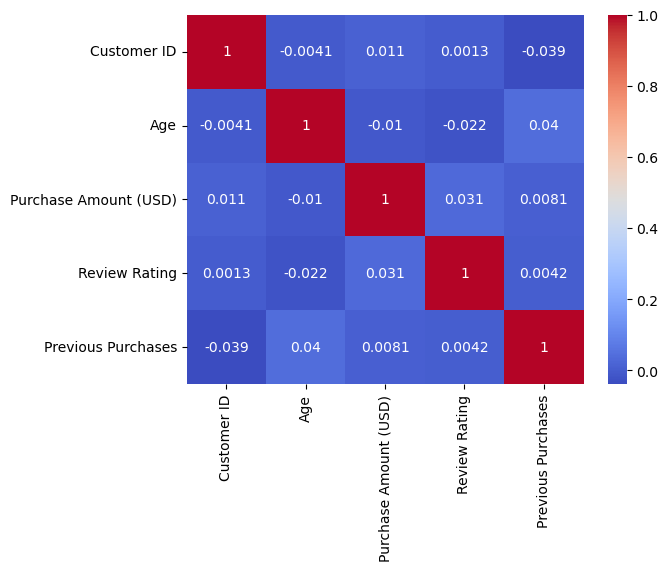

In [125]:
import seaborn as sns

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [126]:
# One-hot encode the 'gender' column and make it binary (0 and 1)
data_encoded = pd.get_dummies(data, columns=['Gender'], drop_first=True)

# Label encode string columns (excluding 'gender')
for column in data.select_dtypes(include=[object]).columns:
    if column != 'Gender':
        data_encoded[column] = data_encoded[column].astype('category').cat.codes

# Print the encoded DataFrame
data_encoded

,Customer ID,Age,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Gender_Male
0,1,55,2,1,53,16,0,7,3,3.1,1,2,1,1,1,14,5,3,True
1,2,19,23,1,64,18,0,12,3,3.1,1,0,1,1,1,2,1,3,True
2,3,50,11,1,73,20,2,12,1,3.1,1,1,2,1,1,23,2,6,True
3,4,21,14,2,90,38,1,12,1,3.5,1,4,3,1,1,49,4,6,True
4,5,45,2,1,49,36,1,21,1,2.7,1,1,2,1,1,31,4,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,9,1,28,45,0,21,2,4.2,0,1,0,0,0,32,5,6,False
3896,3897,52,0,0,49,14,0,23,1,4.5,0,4,5,0,0,41,0,1,False
3897,3898,46,1,0,33,29,0,8,1,2.9,0,2,4,0,0,24,5,5,False
3898,3899,44,17,2,77,22,2,3,2,3.8,0,4,1,0,0,24,5,6,False


In [127]:
# Map True to 1 and False to 0 in the 'gender_Male' column
data_encoded['Gender_Male'] = data_encoded['Gender_Male'].map({True: 1, False: 0})

# Print the updated DataFrame
data_encoded

,Customer ID,Age,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Gender_Male
0,1,55,2,1,53,16,0,7,3,3.1,1,2,1,1,1,14,5,3,1
1,2,19,23,1,64,18,0,12,3,3.1,1,0,1,1,1,2,1,3,1
2,3,50,11,1,73,20,2,12,1,3.1,1,1,2,1,1,23,2,6,1
3,4,21,14,2,90,38,1,12,1,3.5,1,4,3,1,1,49,4,6,1
4,5,45,2,1,49,36,1,21,1,2.7,1,1,2,1,1,31,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,9,1,28,45,0,21,2,4.2,0,1,0,0,0,32,5,6,0
3896,3897,52,0,0,49,14,0,23,1,4.5,0,4,5,0,0,41,0,1,0
3897,3898,46,1,0,33,29,0,8,1,2.9,0,2,4,0,0,24,5,5,0
3898,3899,44,17,2,77,22,2,3,2,3.8,0,4,1,0,0,24,5,6,0


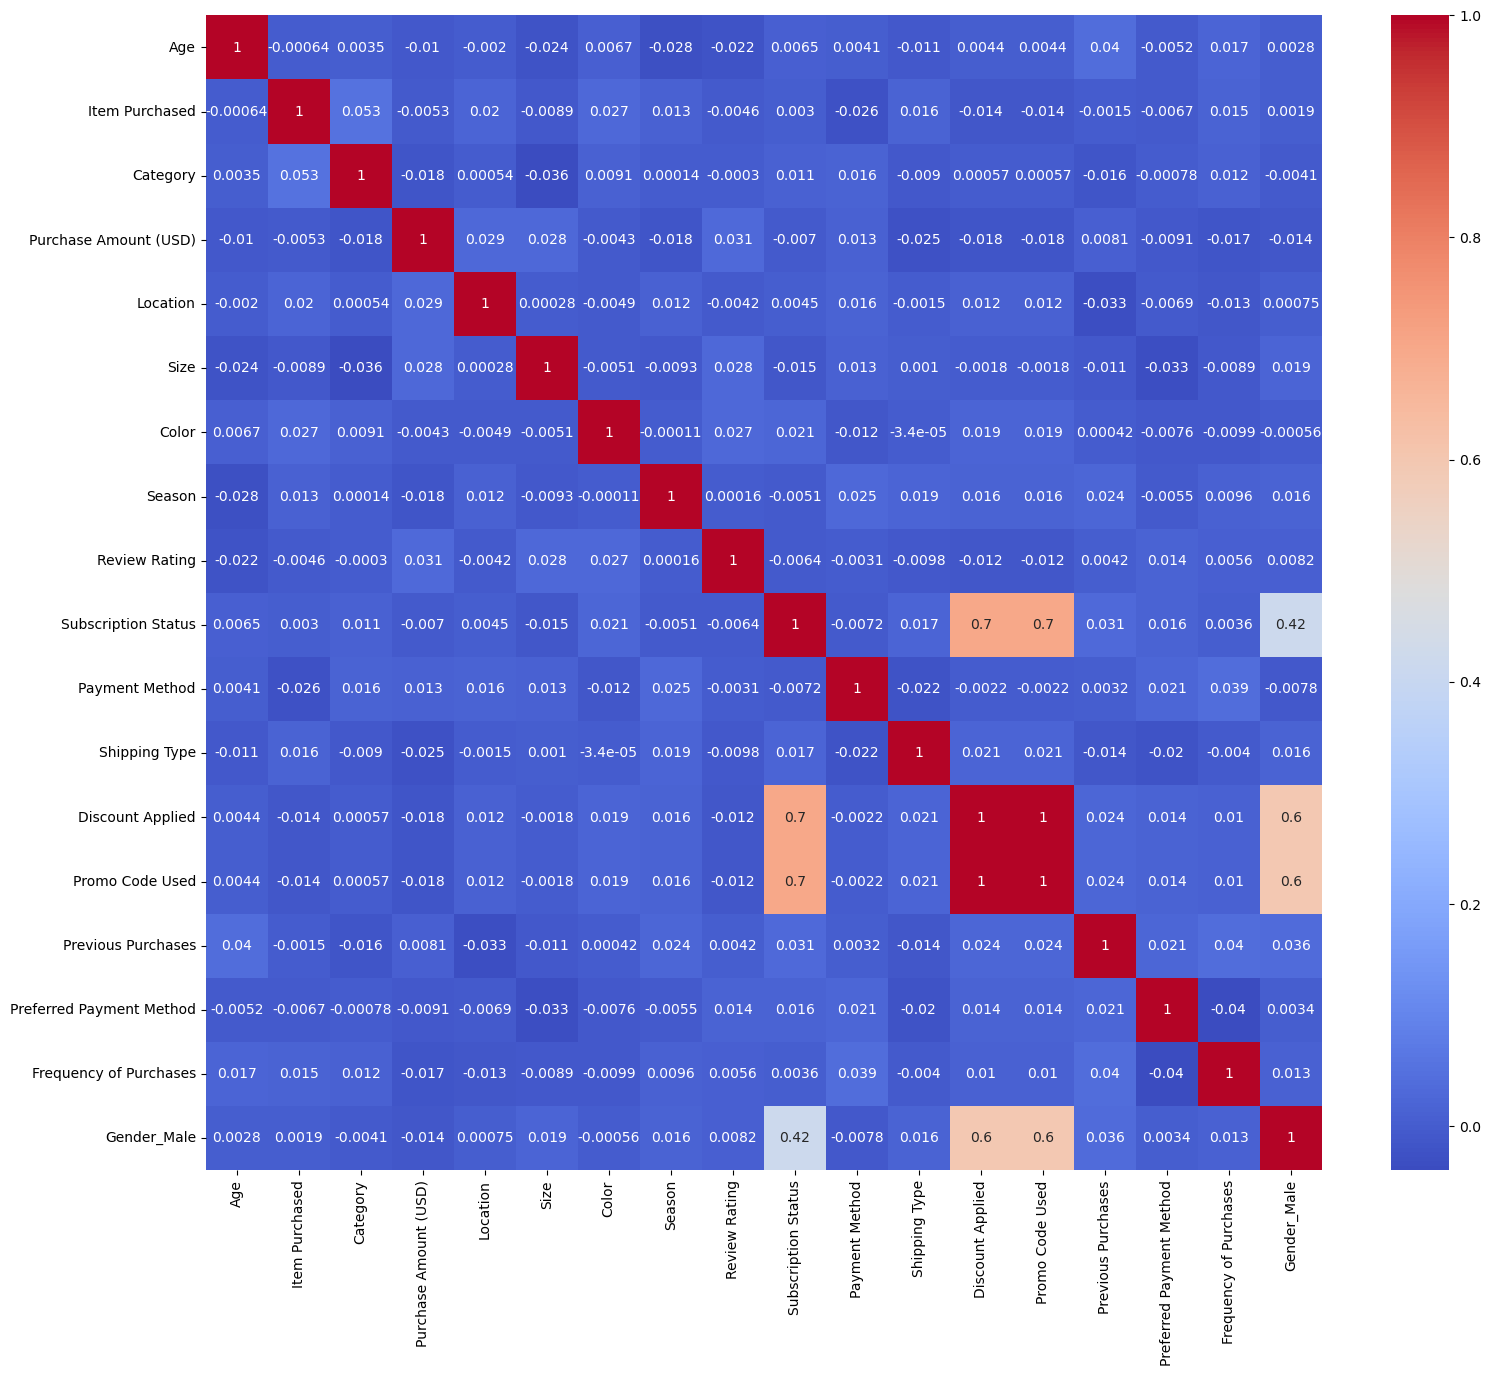

In [146]:
data_encoded.drop('Customer ID',axis=1,inplace=True)
# Calculate correlation matrix
correlation_matrix_all = data_encoded.corr()

# Create a figure (and axes) with a specified figure size
plt.figure(figsize=(18, 15))

# Plot the heatmap on that figure
sns.heatmap(correlation_matrix_all, 
            annot=True, 
            cmap='coolwarm')

# Show the plot
plt.show()

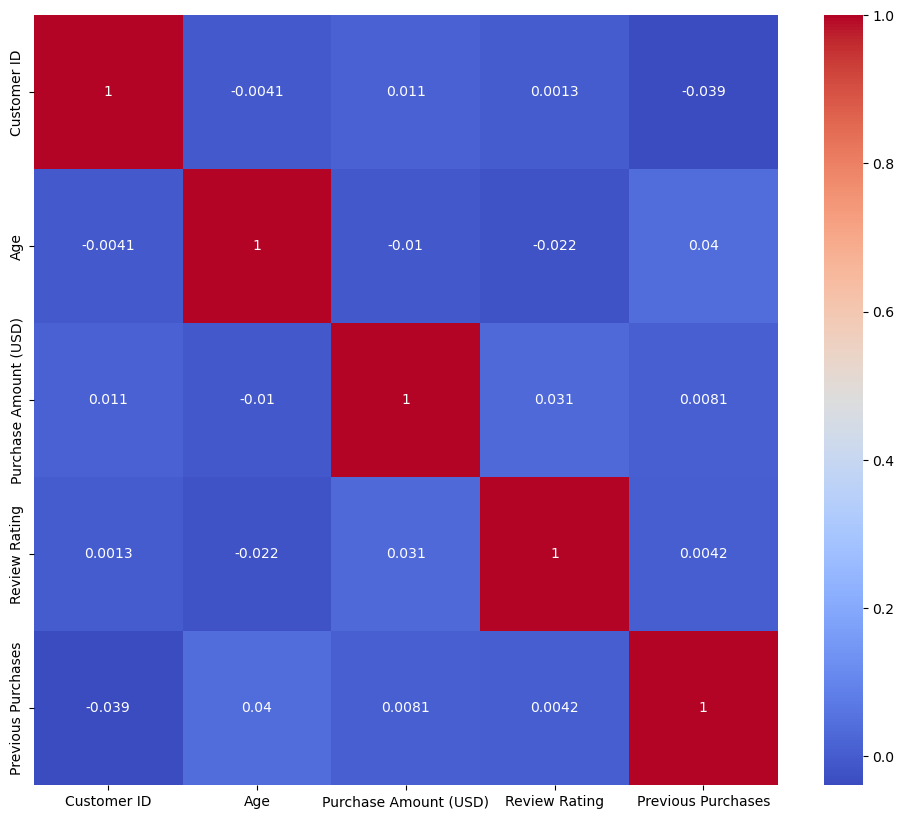

In [129]:
# Select the target column (purchase_amount)
target_column = 'purchase_amount'

# Select numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns

# Calculate correlation matrix (including the target column)
correlation_matrix = data[numerical_columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [130]:
data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


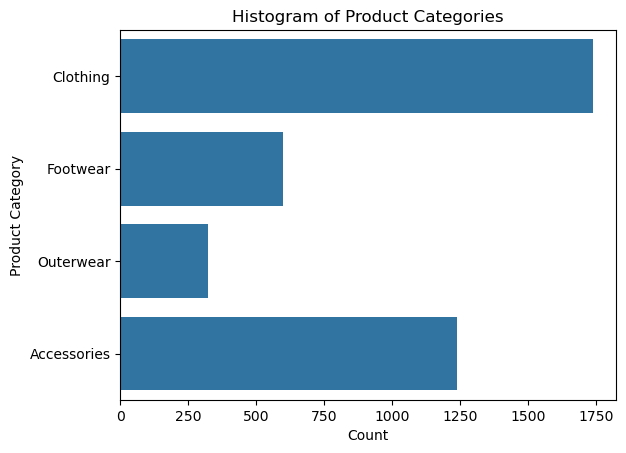

In [131]:
import seaborn as sns

# Select the 'product_category' column
product_categories = data['Category']

# Create a histogram of each unique value in 'product_category'
sns.countplot(y=product_categories)

# Set the title and labels of the plot
plt.title('Histogram of Product Categories')
plt.ylabel('Product Category')
plt.xlabel('Count')

plt.show()


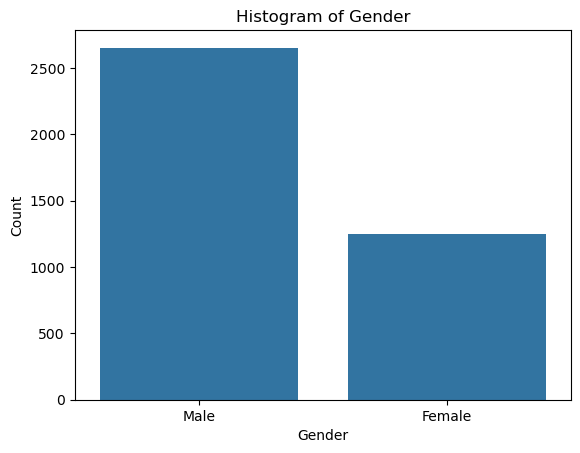

In [132]:
import seaborn as sns

genders = data['Gender']

sns.countplot(x=genders)

plt.title('Histogram of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

In [133]:
import pandas as pd


gender_product_counts = (
    data.groupby(["Gender", "Category"])
      .size()
      .reset_index(name="count")
)

top_counts_by_gender = (
    gender_product_counts.groupby("Gender", group_keys=True)
    .apply(lambda x: x.nlargest(5, columns="count"))  # top 5 per gender
    .reset_index(drop=True)
)
top_counts_by_gender

C:\Users\Adonis\AppData\Local\Temp\ipykernel_27896\2804353834.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, columns="count"))  # top 5 per gender


,Gender,Category,count
0,Female,Clothing,556
1,Female,Accessories,392
2,Female,Footwear,199
3,Female,Outerwear,101
4,Male,Clothing,1181
5,Male,Accessories,848
6,Male,Footwear,400
7,Male,Outerwear,223


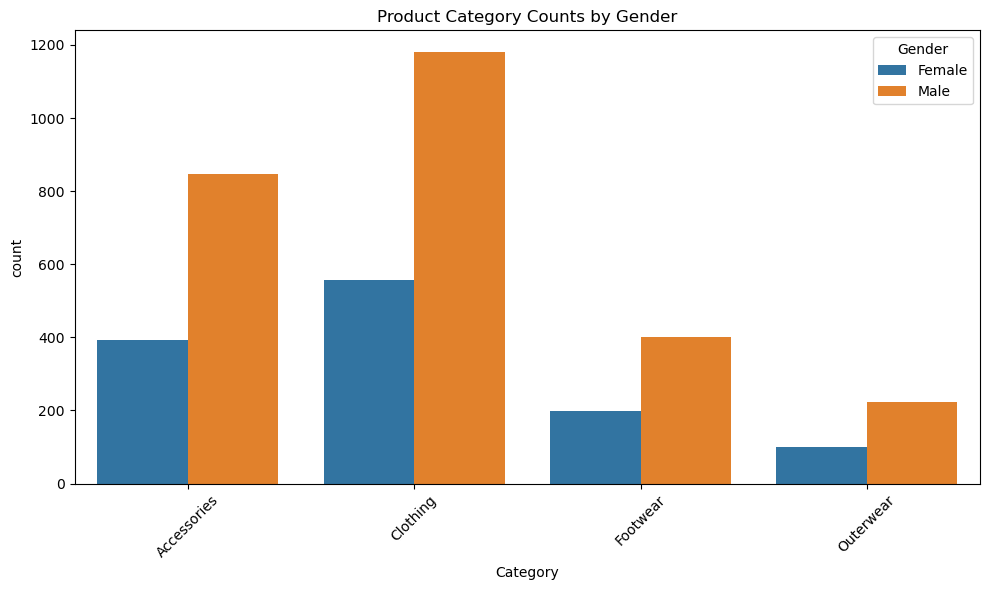

In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataframe `df` with columns: "Gender", "Product_Category"

# 1. Group by gender and product category, count how many times each occurs
gender_product_counts = (
    data.groupby(["Gender", "Category"])
      .size()
      .reset_index(name="count")
)

# 2. Plot a side-by-side bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_product_counts, 
            x="Category", 
            y="count", 
            hue="Gender")

plt.title("Product Category Counts by Gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [135]:
data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


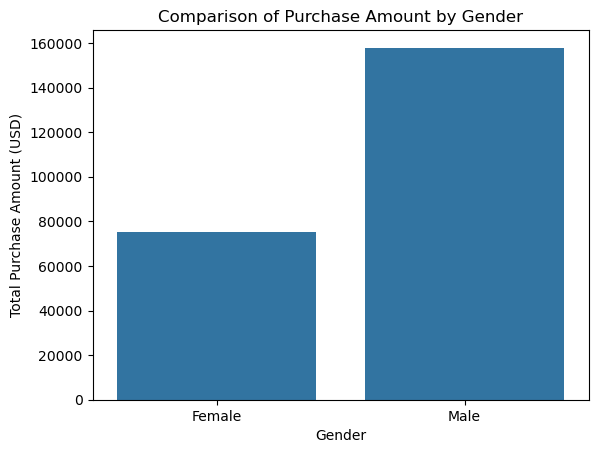

In [136]:
import seaborn as sns

# Calculate the total purchase amount for each gender
gender_purchase_amount = data.groupby("Gender")["Purchase Amount (USD)"].sum().reset_index()

# Create a bar chart
sns.barplot(data=gender_purchase_amount, x="Gender", y="Purchase Amount (USD)")

# Set the title and labels of the plot
plt.title("Comparison of Purchase Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Purchase Amount (USD)")

# Show the plot
plt.show()

In [137]:
data_encoded

,Customer ID,Age,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Gender_Male
0,1,55,2,1,53,16,0,7,3,3.1,1,2,1,1,1,14,5,3,1
1,2,19,23,1,64,18,0,12,3,3.1,1,0,1,1,1,2,1,3,1
2,3,50,11,1,73,20,2,12,1,3.1,1,1,2,1,1,23,2,6,1
3,4,21,14,2,90,38,1,12,1,3.5,1,4,3,1,1,49,4,6,1
4,5,45,2,1,49,36,1,21,1,2.7,1,1,2,1,1,31,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,9,1,28,45,0,21,2,4.2,0,1,0,0,0,32,5,6,0
3896,3897,52,0,0,49,14,0,23,1,4.5,0,4,5,0,0,41,0,1,0
3897,3898,46,1,0,33,29,0,8,1,2.9,0,2,4,0,0,24,5,5,0
3898,3899,44,17,2,77,22,2,3,2,3.8,0,4,1,0,0,24,5,6,0


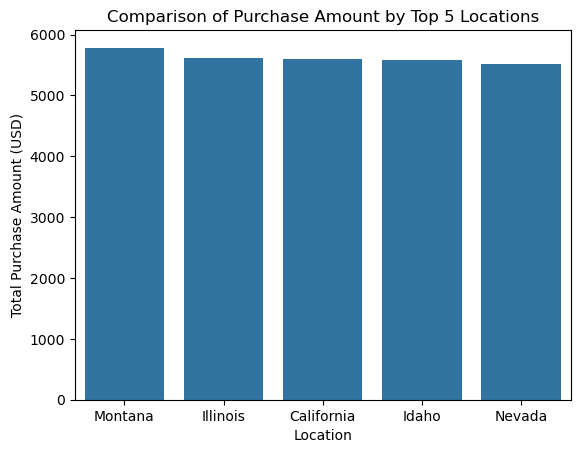

In [ ]:
import seaborn as sns

# Calculate the total purchase amount for each location
location_purchase_amount = data.groupby("Location")["Purchase Amount (USD)"].sum().reset_index()

# Sort the locations by purchase amount in descending order
location_purchase_amount = location_purchase_amount.sort_values(by="Purchase Amount (USD)", ascending=False)

# Select the top 5 locations
top_locations = location_purchase_amount.head(5)w

# Create a bar chart
sns.barplot(data=top_locations, x="Location", y="Purchase Amount (USD)")

# Set the title and labels of the plot
plt.title("Comparison of Purchase Amount by Top 5 Locations")
plt.xlabel("Location")
plt.ylabel("Total Purchase Amount (USD)")

# Show the plot
plt.show()

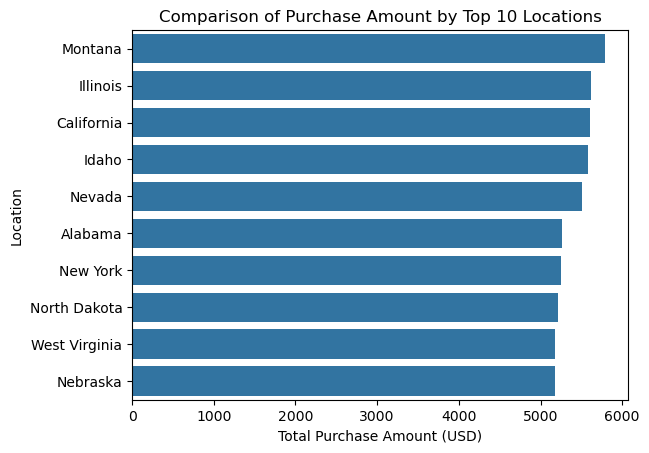

In [139]:
import seaborn as sns

# Calculate the total purchase amount for each location
location_purchase_amount = data.groupby("Location")["Purchase Amount (USD)"].sum().reset_index()

# Sort the locations by purchase amount in descending order
location_purchase_amount = location_purchase_amount.sort_values(by="Purchase Amount (USD)", ascending=False)

# Select the top 10 locations
top_locations = location_purchase_amount.head(10)

# Create a horizontal bar chart
sns.barplot(data=top_locations, x="Purchase Amount (USD)", y="Location", orient='h')

# Set the title and labels of the plot
plt.title("Comparison of Purchase Amount by Top 10 Locations")
plt.xlabel("Total Purchase Amount (USD)")
plt.ylabel("Location")

# Show the plot
plt.show()

In [140]:
data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


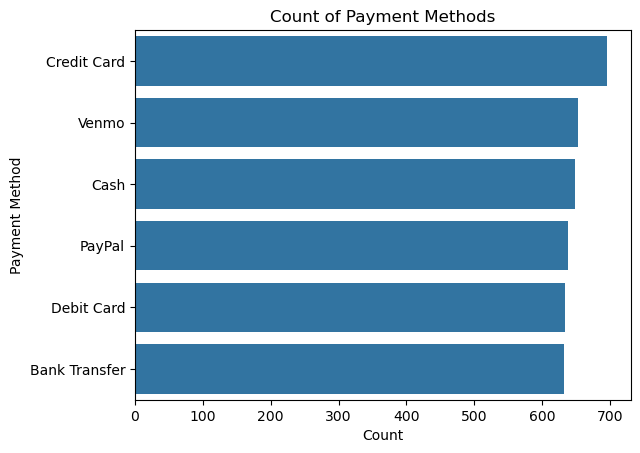

In [141]:
import seaborn as sns

# Calculate the count of each payment method
payment_method_counts = data["Payment Method"].value_counts()

# Sort the payment methods in descending order
payment_method_counts = payment_method_counts.sort_values(ascending=False)

# Create a horizontal bar chart
sns.barplot(x=payment_method_counts.values, y=payment_method_counts.index, orient='h')

# Set the title and labels of the plot
plt.title("Count of Payment Methods")
plt.xlabel("Count")
plt.ylabel("Payment Method")

# Show the plot
plt.show()

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix for numerical columns
correlation_matrix = data_encoded[numerical_columns].corr()

# Create a figure (and axes) with a specified figure size
plt.figure(figsize=(20, 15))  # Increase the figure size
 
# Plot the heatmap on that figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

KeyError: "['Customer ID'] not in index"